## Feature Engineering: Feature Creation

### Read in raw text

In [3]:
import pandas as pd

dataset = pd.read_csv('SMSSpamCollection.tsv', sep='\t')
dataset.columns = ['label', 'body']

### Create feature for text message length

In [4]:
dataset['body_len'] = dataset['body'].apply(lambda x: len(x) - x.count(" "))

dataset.head()

label                                               body  body_len
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128
1   ham  Nah I don't think he goes to usf, he lives aro...        49
2   ham  Even my brother is not like to speak with me. ...        62
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135

### Create feature for percentage of text that is punctuation

In [5]:
import string

def count_punct(text):
  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text) - text.count(" ")), 3) * 100

dataset['punct%'] = dataset['body'].apply(lambda x: count_punct(x))
dataset.head()

label                                               body  body_len  punct%
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
1   ham  Nah I don't think he goes to usf, he lives aro...        49     4.1
2   ham  Even my brother is not like to speak with me. ...        62     3.2
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28     7.1
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135     4.4

## Evaluation

In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

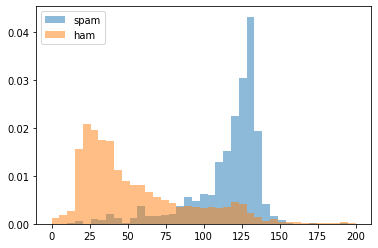

In [14]:
bins = np.linspace(0, 200, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['body_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')

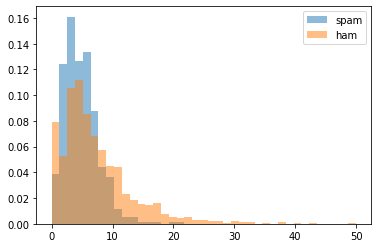

In [17]:
bins = np.linspace(0, 50, 40)
pyplot.hist(dataset[dataset['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(dataset[dataset['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')